# Import Libraries

In [226]:
import numpy as np
import pandas as pd

# Read Data

Data source: https://www.kaggle.com/datasets/jaganadhg/house-hold-energy-data

In [227]:
df = pd.read_csv('D202.csv')

In [228]:
df.head()

,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,COST,NOTES
0,Electric usage,10/22/2016,0:00,0:14,0.01,kWh,$0.00,NaN
1,Electric usage,10/22/2016,0:15,0:29,0.01,kWh,$0.00,NaN
2,Electric usage,10/22/2016,0:30,0:44,0.01,kWh,$0.00,NaN
3,Electric usage,10/22/2016,0:45,0:59,0.01,kWh,$0.00,NaN
4,Electric usage,10/22/2016,1:00,1:14,0.01,kWh,$0.00,NaN


# Seeing the number of unique values for each column

In [229]:
df.nunique()

TYPE            1
DATE          733
START TIME     96
END TIME       96
USAGE         200
UNITS           1
COST           49
NOTES           0
dtype: int64

Since the values of TYPE and UNITS columns are all the same, we can delete them both 

In [230]:
df = df.drop(columns=['TYPE','UNITS'])

In [231]:
df

,DATE,START TIME,END TIME,USAGE,COST,NOTES
0,10/22/2016,0:00,0:14,0.01,$0.00,NaN
1,10/22/2016,0:15,0:29,0.01,$0.00,NaN
2,10/22/2016,0:30,0:44,0.01,$0.00,NaN
3,10/22/2016,0:45,0:59,0.01,$0.00,NaN
4,10/22/2016,1:00,1:14,0.01,$0.00,NaN
...,...,...,...,...,...,...
70363,10/24/2018,22:45,22:59,0.02,$0.00,NaN
70364,10/24/2018,23:00,23:14,0.03,$0.01,NaN
70365,10/24/2018,23:15,23:29,0.03,$0.01,NaN
70366,10/24/2018,23:30,23:44,0.03,$0.01,NaN


# Checking null values for each column

In [232]:
df.isnull().sum()

DATE              0
START TIME        0
END TIME          0
USAGE             0
COST              0
NOTES         70368
dtype: int64

Since the 'NOTES' column contains only null values, we can drop it.

In [233]:
df = df.drop(columns=['NOTES'])

In [234]:
df

,DATE,START TIME,END TIME,USAGE,COST
0,10/22/2016,0:00,0:14,0.01,$0.00
1,10/22/2016,0:15,0:29,0.01,$0.00
2,10/22/2016,0:30,0:44,0.01,$0.00
3,10/22/2016,0:45,0:59,0.01,$0.00
4,10/22/2016,1:00,1:14,0.01,$0.00
...,...,...,...,...,...
70363,10/24/2018,22:45,22:59,0.02,$0.00
70364,10/24/2018,23:00,23:14,0.03,$0.01
70365,10/24/2018,23:15,23:29,0.03,$0.01
70366,10/24/2018,23:30,23:44,0.03,$0.01


# Remove dollar sign in COST column
We want to take only the values

In [235]:
df["COST"] = df["COST"].str.replace("$", "", regex=False).astype(float)

In [236]:
df

,DATE,START TIME,END TIME,USAGE,COST
0,10/22/2016,0:00,0:14,0.01,0.00
1,10/22/2016,0:15,0:29,0.01,0.00
2,10/22/2016,0:30,0:44,0.01,0.00
3,10/22/2016,0:45,0:59,0.01,0.00
4,10/22/2016,1:00,1:14,0.01,0.00
...,...,...,...,...,...
70363,10/24/2018,22:45,22:59,0.02,0.00
70364,10/24/2018,23:00,23:14,0.03,0.01
70365,10/24/2018,23:15,23:29,0.03,0.01
70366,10/24/2018,23:30,23:44,0.03,0.01


# Range of the DATE column

In [237]:
df

,DATE,START TIME,END TIME,USAGE,COST
0,10/22/2016,0:00,0:14,0.01,0.00
1,10/22/2016,0:15,0:29,0.01,0.00
2,10/22/2016,0:30,0:44,0.01,0.00
3,10/22/2016,0:45,0:59,0.01,0.00
4,10/22/2016,1:00,1:14,0.01,0.00
...,...,...,...,...,...
70363,10/24/2018,22:45,22:59,0.02,0.00
70364,10/24/2018,23:00,23:14,0.03,0.01
70365,10/24/2018,23:15,23:29,0.03,0.01
70366,10/24/2018,23:30,23:44,0.03,0.01


We can see that the date start at 2016 and ends in 2018

# Plotting the whole data

## Plotting electricity usage

C:\Users\Asty\AppData\Local\Temp\ipykernel_10536\1459665475.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usage_plot['DATE'] = pd.to_datetime(usage_plot['DATE'])


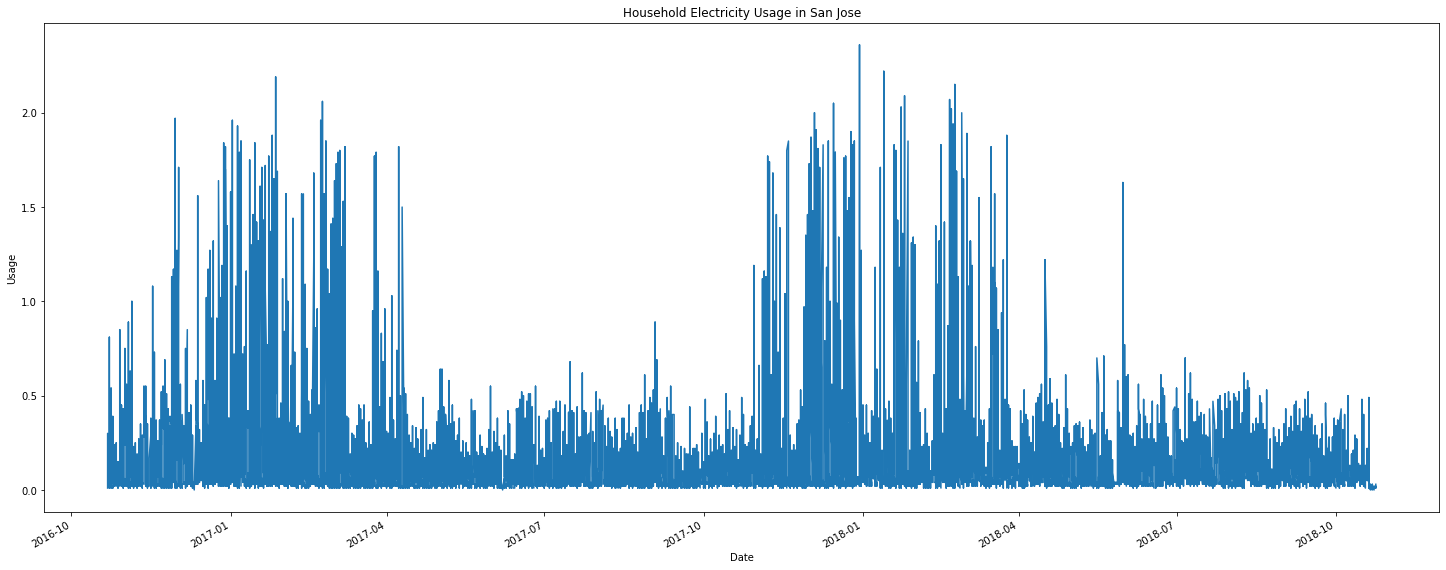

In [238]:
import matplotlib.pyplot as plt

usage_plot = df[['DATE','USAGE']]

usage_plot['DATE'] = pd.to_datetime(usage_plot['DATE'])
usage_plot.set_index('DATE', inplace=True)
plt.figure(figsize=(25, 10))
usage_plot['USAGE'].plot()
plt.title('Household Electricity Usage in San Jose')
plt.xlabel('Date')
plt.ylabel('Usage')
plt.show()

The electricity consumption exhibits significant peaks during specific periods:
- From the end of 2016 to the beginning of 2017
- From the end of 2017 to the beginning of 2018
- During one particular month in 2018

Notice that we have one pattern here: the electricity usage is always distinctly high from the end of each year through the start of the following year. Further observations can be done later.

## Plotting Electricity Cost

C:\Users\Asty\AppData\Local\Temp\ipykernel_10536\375036423.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usage_plot['DATE'] = pd.to_datetime(usage_plot['DATE'])


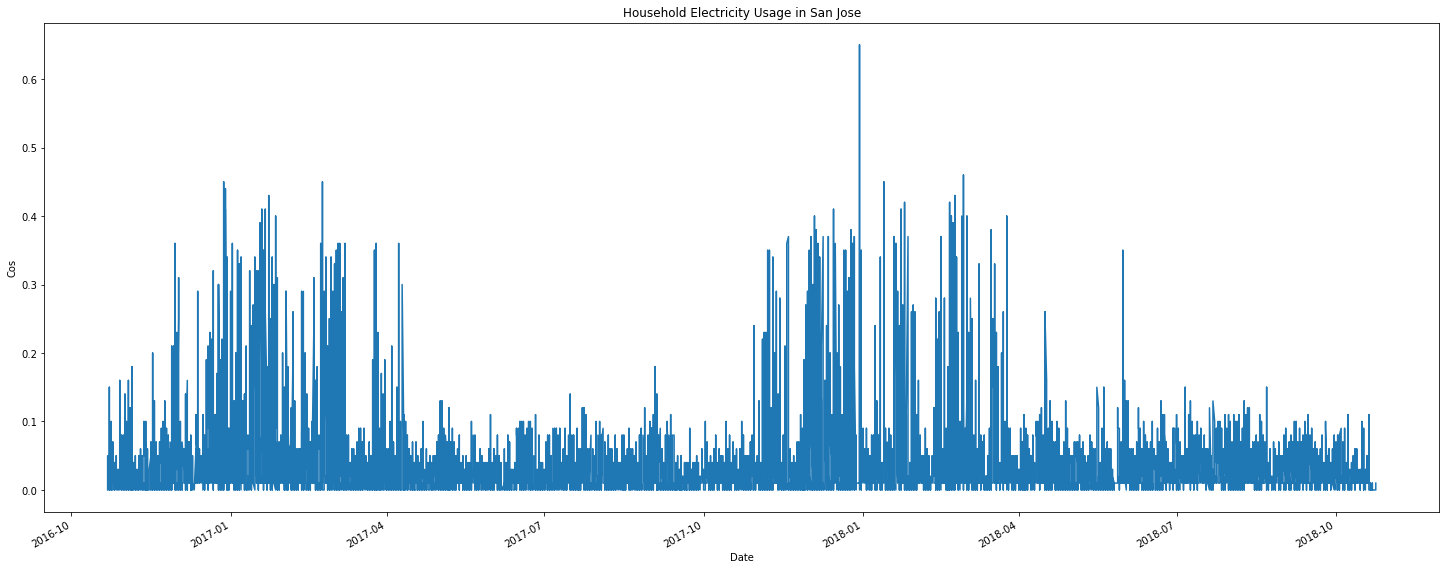

In [239]:
import matplotlib.pyplot as plt

usage_plot = df[['DATE','COST']]

usage_plot['DATE'] = pd.to_datetime(usage_plot['DATE'])
usage_plot.set_index('DATE', inplace=True)
plt.figure(figsize=(25, 10))
usage_plot['COST'].plot()
plt.title('Household Electricity Usage in San Jose')
plt.xlabel('Date')
plt.ylabel('Cos')
plt.show()

The pattern is quite the same with electricity usage. We can observe the correlation between them.

# Correlation between electricity usage and cost

<AxesSubplot:xlabel='USAGE', ylabel='COST'>

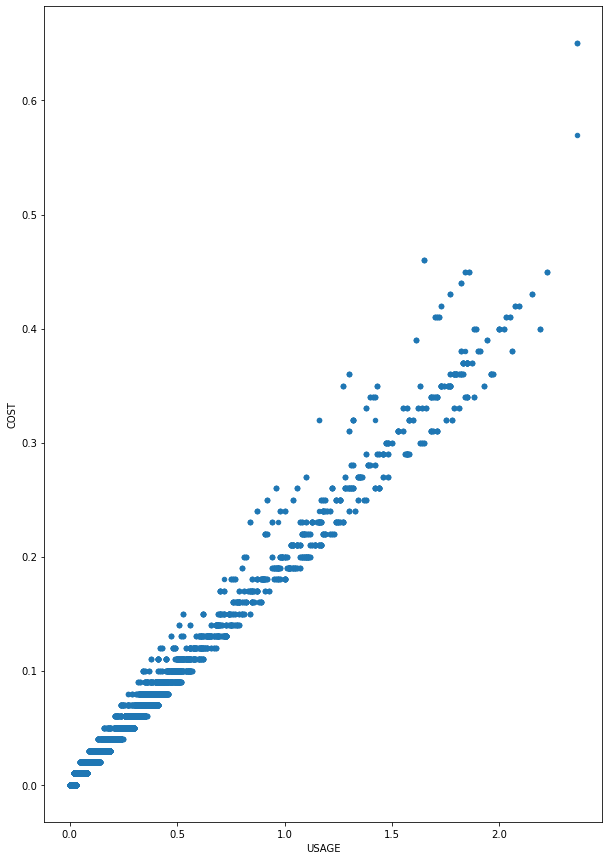

In [240]:
df.plot.scatter(x='USAGE', y='COST',figsize=(10, 15))

From the image, the pattern indicates that usage and cost have a positive correlation. Now let's see the correlation value of them both.

In [241]:
df.corr(method='pearson')

,USAGE,COST
USAGE,1.000000,0.991939
COST,0.991939,1.000000


The correlation value is very high, indicating a strong linear relationship between the two variables. As one variable increases, the other variable tends to increase in a predictable manner. This strong correlation is useful for making predictions about one variable based on the value of the other.

# Creating timestamp column

DATE, START TIME, and END TIME columns are deleted since we have timestamp now.

In [242]:
add_prefix_lambda = lambda start_time: "0"+ start_time if int(start_time.split(":")[0]) < 12 else start_time
df["START TIME"] = df["START TIME"].apply(add_prefix_lambda)

df["TIMESTAMP"] = df["DATE"] + " " + df["START TIME"]
df["TIMESTAMP"] = pd.to_datetime(df["TIMESTAMP"])

df = df.drop(columns=['DATE','START TIME','END TIME'])

In [243]:
df

,USAGE,COST,TIMESTAMP
0,0.01,0.00,2016-10-22 00:00:00
1,0.01,0.00,2016-10-22 00:15:00
2,0.01,0.00,2016-10-22 00:30:00
3,0.01,0.00,2016-10-22 00:45:00
4,0.01,0.00,2016-10-22 01:00:00
...,...,...,...
70363,0.02,0.00,2018-10-24 22:45:00
70364,0.03,0.01,2018-10-24 23:00:00
70365,0.03,0.01,2018-10-24 23:15:00
70366,0.03,0.01,2018-10-24 23:30:00


# Creating hourly_df 

The data is aggregrated into one-hour interval. This action simplifies the dataset, making it easier to analyze and visualize. Also, many reporting standards and practices are based on hourly data. Furthermore, in contexts like energy consumption or utility usage, billing cycles and usage tariffs are often based on hourly consumption. 

In [244]:
hourly_df = df.resample("1H", on="TIMESTAMP").sum()
hourly_df= hourly_df.reset_index()

In [245]:
hourly_df

,TIMESTAMP,USAGE,COST
0,2016-10-22 00:00:00,0.04,0.00
1,2016-10-22 01:00:00,0.04,0.00
2,2016-10-22 02:00:00,0.08,0.00
3,2016-10-22 03:00:00,0.04,0.00
4,2016-10-22 04:00:00,0.04,0.00
...,...,...,...
17587,2018-10-24 19:00:00,0.12,0.04
17588,2018-10-24 20:00:00,0.12,0.04
17589,2018-10-24 21:00:00,0.12,0.04
17590,2018-10-24 22:00:00,0.08,0.00


In [246]:
hourly_df['DAY'] = hourly_df['TIMESTAMP'].dt.day
hourly_df['MONTH'] = hourly_df['TIMESTAMP'].dt.month
hourly_df['YEAR'] = hourly_df['TIMESTAMP'].dt.year

Set TIMESTAMP column as index

In [247]:
hourly_df = hourly_df.set_index('TIMESTAMP')

In [248]:
hourly_df

,USAGE,COST,DAY,MONTH,YEAR
TIMESTAMP,,,,,
2016-10-22 00:00:00,0.04,0.00,22,10,2016
2016-10-22 01:00:00,0.04,0.00,22,10,2016
2016-10-22 02:00:00,0.08,0.00,22,10,2016
2016-10-22 03:00:00,0.04,0.00,22,10,2016
2016-10-22 04:00:00,0.04,0.00,22,10,2016
...,...,...,...,...,...
2018-10-24 19:00:00,0.12,0.04,24,10,2018
2018-10-24 20:00:00,0.12,0.04,24,10,2018
2018-10-24 21:00:00,0.12,0.04,24,10,2018
